#### Pertemuan 3 

In [1]:
import requests

url = 'http://103.82.92.37/DM20232/getdata.php'
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    jumlah_data = len(data)
    print('Data yang diterima: ', jumlah_data, '\n')
    print(data)

else:
    print('Gagal mengambil data. Status code: ', response.status_code)

Gagal mengambil data. Status code:  400


In [32]:
from datetime import datetime
import pandas as pd

for mahasiswa in data:
    # Mendapatkan tanggal masuk 
    tgl_masuk = pd.to_datetime(mahasiswa['tgl_masuk'])
    tanggal_lulus = pd.to_datetime(mahasiswa['tanggal_lulus'])

    lama_kuliah = tanggal_lulus - tgl_masuk

    tahun = lama_kuliah.days // 365
    bulan = (lama_kuliah.days % 365) // 30

    if tahun <= 4:
        print("NIM = ", mahasiswa['nim'], "- Lama kuliah = ", tahun, "tahun", bulan, "bulan")
    else:
        print("NIM = ", mahasiswa['nim'], "- Lama kuliah = ", tahun, "tahun", bulan, "bulan (lulus tidak tepat waktu)")




NIM =  15416226201001 - Lama kuliah =  3 tahun 12 bulan
NIM =  15416226201002 - Lama kuliah =  3 tahun 12 bulan
NIM =  15416226201003 - Lama kuliah =  3 tahun 12 bulan
NIM =  15416226201004 - Lama kuliah =  3 tahun 12 bulan
NIM =  15416226201005 - Lama kuliah =  3 tahun 12 bulan
NIM =  15416226201006 - Lama kuliah =  3 tahun 11 bulan
NIM =  15416226201007 - Lama kuliah =  3 tahun 11 bulan
NIM =  15416226201008 - Lama kuliah =  3 tahun 11 bulan
NIM =  15416226201009 - Lama kuliah =  6 tahun 12 bulan (lulus tidak tepat waktu)
NIM =  15416226201010 - Lama kuliah =  3 tahun 12 bulan
NIM =  15416226201013 - Lama kuliah =  3 tahun 12 bulan
NIM =  15416226201014 - Lama kuliah =  3 tahun 11 bulan
NIM =  15416226201015 - Lama kuliah =  3 tahun 12 bulan
NIM =  15416226201016 - Lama kuliah =  5 tahun 4 bulan (lulus tidak tepat waktu)
NIM =  15416226201018 - Lama kuliah =  3 tahun 11 bulan
NIM =  15416226201019 - Lama kuliah =  3 tahun 12 bulan
NIM =  15416226201020 - Lama kuliah =  3 tahun 11 bul

In [27]:
import pandas as pd

# Membuat list untuk menyimpan durasi studi setiap mahasiswa
durasi_studi = []

# Melakukan iterasi pada data untuk menghitung durasi studi setiap mahasiswa
for mahasiswa in data:
    # Mengonversi tanggal_masuk dan tanggal_lulus menjadi objek datetime
    tgl_masuk = pd.to_datetime(mahasiswa['tgl_masuk'])
    tanggal_lulus = pd.to_datetime(mahasiswa['tanggal_lulus'])

    # Menghitung durasi studi dalam bulan
    lama_kuliah_bulan = (tanggal_lulus.year - tgl_masuk.year) * 12 + (tanggal_lulus.month - tgl_masuk.month)
    durasi_studi.append(lama_kuliah_bulan)

# Mengonversi list durasi studi menjadi Series pandas
durasi_studi_series = pd.Series(durasi_studi)

# Menghitung rata-rata, median, dan modus
rata_rata_durasi = durasi_studi_series.mean()
median_durasi = durasi_studi_series.median()
modus_durasi = durasi_studi_series.mode()[0]

# Konversi durasi rata-rata, median, dan modus menjadi tahun dan bulan
tahun_rata_rata = int(rata_rata_durasi) // 12
bulan_rata_rata = int(rata_rata_durasi) % 12

tahun_median = int(median_durasi) // 12
bulan_median = int(median_durasi) % 12

tahun_modus = int(modus_durasi) // 12
bulan_modus = int(modus_durasi) % 12

# Menampilkan hasil
print("Rata-rata lama kuliah:", tahun_rata_rata, "tahun", bulan_rata_rata, "bulan")
print("Median lama kuliah:", tahun_median, "tahun", bulan_median, "bulan")
print("Modus lama kuliah:", tahun_modus, "tahun", bulan_modus, "bulan")

Rata-rata lama kuliah: 4 tahun 2 bulan
Median lama kuliah: 3 tahun 11 bulan
Modus lama kuliah: 3 tahun 11 bulan


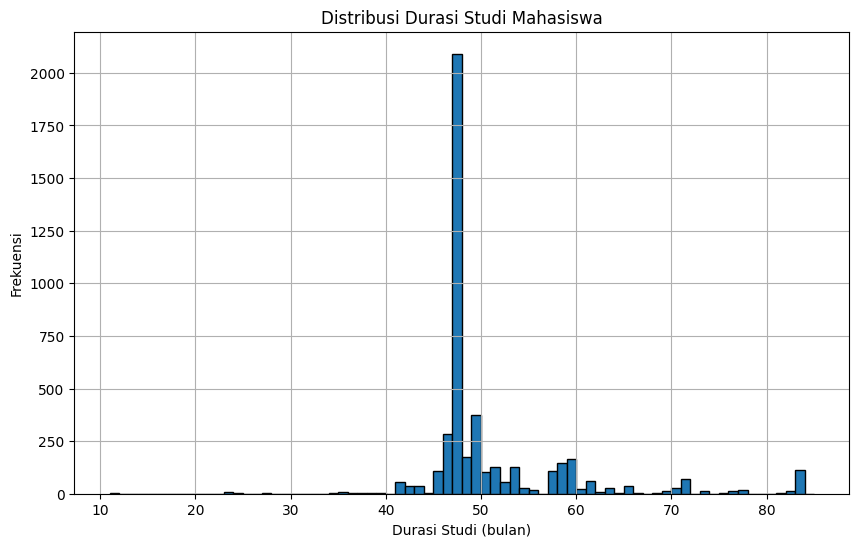

In [28]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(durasi_studi, bins=range(min(durasi_studi), max(durasi_studi) + 1, 1), edgecolor='black')
plt.title('Distribusi Durasi Studi Mahasiswa')
plt.xlabel('Durasi Studi (bulan)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

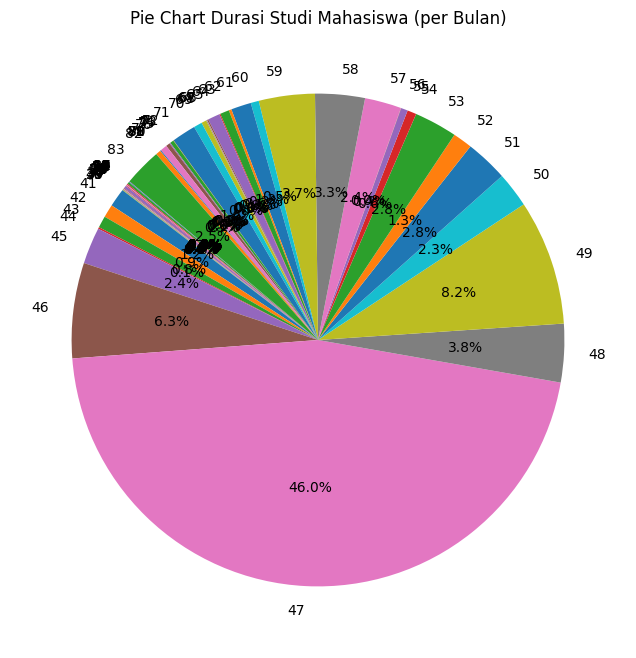

In [31]:
# Pie Chart Menghitung jumlah mahasiswa dalam setiap kategori durasi studi per bulan
kategori_durasi_bulan = pd.cut(durasi_studi_series, bins=range(0, durasi_studi_series.max() + 1, 1), labels=range(1, durasi_studi_series.max() + 1))
jumlah_mahasiswa_per_kategori_bulan = kategori_durasi_bulan.value_counts().sort_index()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(jumlah_mahasiswa_per_kategori_bulan, labels=jumlah_mahasiswa_per_kategori_bulan.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Durasi Studi Mahasiswa (per Bulan)')
plt.show()

#### Pertemuan 4

In [52]:
# Kode program untuk mengambil data dari API
import requests

url = "http://103.82.92.37/DM20232/getdata.php?table=transkip_nilai&limit=100&filter_column=nim&filter_value=15416255201060"

payload={}
headers = {
  'api-key': 'DM20232UBP'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


{"message":"Data berhasil ditemukan.","data":[{"id":1,"nim":"15416255201060","kode_mk":"F02160009","nama_mk":"Entrepreneurship","nama_mk_indo":"Entrepreneurship","nama_mk_ing":"Entrepreneurship","nilai_grade":3.5,"nilai_total":84.25,"semester":5,"sks_mk":2,"grade":"B+"},{"id":2,"nim":"15416255201060","kode_mk":"F02160010","nama_mk":"Kerja Praktik","nama_mk_indo":"Kerja Praktik","nama_mk_ing":"Internship","nilai_grade":3.75,"nilai_total":88.25,"semester":6,"sks_mk":3,"grade":"A-"},{"id":3,"nim":"15416255201060","kode_mk":"IF1160020","nama_mk":"Desain & Analisis Algoritma","nama_mk_indo":"Desain & Analisis Algoritma","nama_mk_ing":"Analysis Algorithm & Design","nilai_grade":3.5,"nilai_total":81.7,"semester":3,"sks_mk":3,"grade":"B+"},{"id":4,"nim":"15416255201060","kode_mk":"IF1160021","nama_mk":"Analisis & Desain System Berorientasi Obyek","nama_mk_indo":"Analisis & Desain System Berorientasi Obyek","nama_mk_ing":"Object Oriented Design System ","nilai_grade":3.75,"nilai_total":86.8,"se

In [54]:
import requests
import pandas as pd

url = "http://103.82.92.37/DM20232/getdata.php?table=transkip_nilai"
headers = {'api-key': "DM20232UBP"}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data['data'])

    # Menampilkan jumlah data yang diterima
    jumlah_data = len(df)
    print("Data yang diterima:", jumlah_data)

    # Menampilkan 10 data pertama sebagai tabel
    print(df.head(10))
else:
    print(f"Gagal mengambil data. Status code: {response.status_code} : {response.text}")

Data yang diterima: 256299
   id             nim    kode_mk                                      nama_mk  \
0   1  15416255201060  F02160009                             Entrepreneurship   
1   2  15416255201060  F02160010                                Kerja Praktik   
2   3  15416255201060  IF1160020                  Desain & Analisis Algoritma   
3   4  15416255201060  IF1160021  Analisis & Desain System Berorientasi Obyek   
4   5  15416255201060  IF1160022           Pemrograman Berorientasi Objek (*)   
5   6  15416255201060  IF1160023                               Metode Numerik   
6   7  15416255201060  IF1160024                               Sistem Operasi   
7   8  15416255201060  IF1160025                 Interaksi Manusia & Komputer   
8   9  15416255201060  IF1160027                         Pemrogram Visual (*)   
9  10  15416255201060  IF1160028                         Sistem Micropocessor   

                                  nama_mk_indo  \
0                             E

In [41]:
df = pd.DataFrame(df)
df

,id,nim,kode_mk,nama_mk,nama_mk_indo,nama_mk_ing,nilai_grade,nilai_total,semester,sks_mk,grade
0,1,15416255201060,F02160009,Entrepreneurship,Entrepreneurship,Entrepreneurship,3.50,84.25,5,2,B+
1,2,15416255201060,F02160010,Kerja Praktik,Kerja Praktik,Internship,3.75,88.25,6,3,A-
2,3,15416255201060,IF1160020,Desain & Analisis Algoritma,Desain & Analisis Algoritma,Analysis Algorithm & Design,3.50,81.70,3,3,B+
3,4,15416255201060,IF1160021,Analisis & Desain System Berorientasi Obyek,Analisis & Desain System Berorientasi Obyek,Object Oriented Design System,3.75,86.80,3,3,A-
4,5,15416255201060,IF1160022,Pemrograman Berorientasi Objek (*),Pemrograman Berorientasi Objek,Object Oriented Programming,3.75,85.50,3,3,A-
...,...,...,...,...,...,...,...,...,...,...,...
256294,259312,16416286206133,UBP160004,BAHASA INDONESIA,Bahasa Indonesia,Indonesian,3.75,86.20,2,2,A-
256295,259313,16416286206133,UBP160005,JATIDIRI BANGSA,Jatidiri Bangsa,National Identity,3.75,85.25,3,2,A-
256296,259314,16416286206133,UBP160006,KKN,KKN,Community Service,3.75,84.55,7,3,A-
256297,259315,16416286206133,UBP160007,GENERAL ENGLISH,General English,General English,2.76,70.35,1,2,B-
